# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

In [ ]:
Joris van Doorn, jorva845 || Weng Hang Wong, wenwo535

# Part 1: Get the data

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

In [1]:
'''
Q1: The graphics card is Tesla K80.

Q2: It has 4992 cores.

Q3: It has 11441 MiB memory.

Q4: Basically, the input data, weight parameters and activations are needed to stored in the CPU memory while training a DNN

Q5:  CPU: Intel(R) Xeon(R) CPU E5-2690 v3 @ 2.60GHz, which has 6 cores

Q6: 53GB CPU memory is available in the cloud machine.
'''


'\nQ1: The graphics card is Tesla K80.\n\nQ2: It has 4992 cores.\n\nQ3: It has 11441 MiB memory.\n\nQ4: Basically, the input data, weight parameters and activations are needed to stored in the CPU memory while training a DNN\n\nQ5:  CPU: Intel(R) Xeon(R) CPU E5-2690 v3 @ 2.60GHz, which has 6 cores\n\nQ6: 53GB CPU memory is available in the cloud machine.\n'

# Part 4: Load the data

Load the dataset from the prepared npy files


In [4]:
from numpy import genfromtxt
import numpy as np

# Load data from numpy arrays, for faster loading
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')

# Remove the first 24 covariates
X2 = np.delete(X, range(24), axis=1)

print('The covariates of X have size {}.'.format(X.shape))
print('The covariates of X2 have size {}.'.format(X2.shape))
print('The labels have size {}.'.format(Y.shape))

uniq_Y=np.unique(Y)

# Print the number of examples of each class
print('The unique classes are: ', uniq_Y)
uniq_elem, count_elem = np.unique(Y, return_counts=True)
print("The number of examples of each class: ")
print(np.asarray((uniq_elem, count_elem)))

The covariates of X have size (764137, 116).
The covariates of X2 have size (764137, 92).
The labels have size (764137,).
The unique classes are:  [0. 1.]
The number of examples of each class: 
[[0.00000e+00 1.00000e+00]
 [1.21621e+05 6.42516e+05]]


# Part 5: How good is a naive classifier?

Question 7: Given the distribution of examples, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by random chance.

In [5]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()
print("Check if there are NaNs in one of the columns of X: ", np.isnan(X2))

# Print the number of NaNs (not a number) in the labels
print("Y has: ",sum(np.isnan(Y))," NaNs")

# Print the number of NaNs in the covariates
print("X has: ", sum(np.isnan(X2)), " NaNs")

Check if there are NaNs in one of the columns of X:  [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Y has:  0  NaNs
X has:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]  NaNs


# Part 6: Preprocessing

Lets do some simple preprocessing

In [6]:
# Convert covariates to floats
X2=X2.astype(float)

# Convert labels to ints
Y=Y.astype(int)

# Remove mean of each covariate (column)
X_min_mean = X2 - X2.mean(axis=0, keepdims=True)

# Divide each covariate (column) by its standard deviation
X_div_std = X_min_mean / X_min_mean.std(axis=0)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print("Mean: ", X_min_mean.mean(axis=0))
print("Standard Deviation: ", X_div_std.std(axis=0))



Mean:  [-6.10156770e-14  3.47659863e-13  2.82797379e-15  2.23343277e-13
  8.03913919e-12  9.37897033e-16  1.57376266e-13  2.21307398e-16
  3.57662511e-15 -5.80234522e-17 -7.56982884e-16 -4.52285371e-16
 -2.96068384e-17  3.08598289e-19 -2.28783497e-16 -1.78533699e-16
  2.68098105e-16 -1.71154306e-14  6.76047607e-15 -2.72263891e-17
 -1.27856165e-19  6.54995509e-17  1.99553067e-14  5.94517218e-16
 -2.12336080e-14  7.74122120e-15 -1.60680329e-16  8.31530002e-18
 -1.35626100e-15 -1.51753644e-14 -1.34495387e-16 -1.70059300e-14
 -3.30406366e-15  1.52348757e-16 -2.83143288e-18 -2.69371645e-14
  1.18546376e-14  2.36854708e-16 -1.04834988e-14 -1.86055919e-14
  8.79576024e-16  1.53706357e-17  2.21307398e-16 -2.99841854e-10
  8.38383693e-02 -2.28783497e-16  2.49296193e-10  5.16263445e-01
  6.55367454e-17  2.79561187e-10  9.49944840e-01 -1.27621839e-15
 -9.26046432e-10  1.33471354e+00 -2.27094865e-15  4.03242052e-09
  1.09216018e+00 -1.59728150e-14  1.44850341e-14  6.43465207e-17
  9.08617506e-15 -

# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)


In [7]:
# Your code
n_obs = len(X_div_std)

n_train = round(n_obs * 0.7)
n_temp = n_obs-n_train

Xtrain, Xtemp = X_div_std[:n_train,:], X_div_std[n_train:,:]
Ytrain, Ytemp = Y[:n_train,], Y[n_train:,]

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))
print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%
uniq_elem_Ytrain, count_elem_Ytrain = np.unique(Ytrain, return_counts=True)
print("The number of examples of each class in Ytrain: ")
print(np.asarray((uniq_elem_Ytrain, count_elem_Ytrain)))
uniq_elem_Ytemp, count_elem_Ytemp = np.unique(Ytemp, return_counts=True)
print("The number of examples of each class in Ytemp: ")
print(np.asarray((uniq_elem_Ytemp, count_elem_Ytemp)))


Xtrain has size (534896, 92).
Ytrain has size (534896,).
Xtemp has size (229241, 92).
Ytemp has size (229241,).
The number of examples of each class in Ytrain: 
[[     0      1]
 [121621 413275]]
The number of examples of each class in Ytemp: 
[[     1]
 [229241]]


# Part 8: Number of examples per class

Question 8: Can we use the dataset as it is? Why not? 


We can not use the orginal dataset. First, we want to avoid the relationship of the original order of training data. Second, the keras might learn the order on each training and it might cause overfitting, so we need to shuffle the data. Third, shuffling data helps to avoid the local minimum because it needs randomness to find the global minimum.


Lets randomly shuffle the data, to get some examples of each class in training data and in the remaining 30%. Use the function `shuffle` in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

In [8]:
from sklearn.utils import shuffle

'''
We cannot use the previous data, 
because the data is not shuffled, 
but sorted by class. 
As you can see Ytemp consists only of observations of class 1
'''

# Randomly shuffle data, to get both classes in training and testing
X_shuf, Y_shuf =  shuffle(X_div_std, Y)

# Divide the data into training and validation/test again
Xtrain=X_shuf[0:n_train,]
Ytrain=Y_shuf[0:n_train]
Xtemp=X_shuf[n_train:,]
Ytemp=Y_shuf[n_train:]

# Print the number of examples of each class, for the training data and the remaining 30%
uniq_elem_Ytrain, count_elem_Ytrain = np.unique(Ytrain, return_counts=True)
print("The number of examples of each class in Ytrain: ")
print(np.asarray((uniq_elem_Ytrain, count_elem_Ytrain)))
uniq_elem_Ytemp, count_elem_Ytemp = np.unique(Ytemp, return_counts=True)
print("The number of examples of each class in Ytrain: ")
print(np.asarray((uniq_elem_Ytemp, count_elem_Ytemp)))


The number of examples of each class in Ytrain: 
[[     0      1]
 [ 85252 449644]]
The number of examples of each class in Ytrain: 
[[     0      1]
 [ 36369 192872]]


#  Part 9: Split non-training data data into validation and test
Split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [9]:
from sklearn.model_selection import train_test_split


Xtest, Xval, Ytest, Yval = train_test_split(Xtemp, Ytemp, test_size=0.5)


print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114620, 92), (114621,) and (114620,)


# Part 10: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [68]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.losses import binary_crossentropy as BC
from keras.layers.normalization import BatchNormalization

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer == 'sgd':
        optimizer = SGD(lr=learning_rate)
    elif optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    # Add first layer, requires input shape
    model.add(Dense(n_nodes, activation=act_fun,input_shape=input_shape))
        
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(n_nodes,activation=act_fun))
        if(use_bn==True):
            model.add(BatchNormalization())
        if(use_dropout==True):
            model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
        if(use_custom_dropout==True):
            myDropout(0.5)
               
    # Final layer
    model.add(Dense(1,activation='sigmoid'))
    
    # Compile model
    model.compile(loss=BC,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model

In [11]:
# Lets define a help function for plotting the training results

# IMPORTANT NOTE
# The history unfortunately behaves a bit randomly for every user
# If the plots for accuracy and loss look mixed, change the order of
# val_loss, val_acc, loss, acc
# until the plots look as they "should"

import matplotlib.pyplot as plt
def plot_results(history):
    val_loss, val_acc, loss, acc = history.history.values()

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 11: Train the DNN

Time to train the DNN, we start simple with 2 layers with 2 nodes each, learning rate 0.1.

### 2 layers, 20 nodes

In [12]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = Xtrain.shape[1:]

# Build the model
model1 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=20, 
                   act_fun='sigmoid', 
                   optimizer='sgd', 
                   learning_rate=0.1, 
                   use_bn=False, 
                   use_dropout=False, 
                   use_custom_dropout=False)

# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain, 
                      Ytrain, 
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 1s - loss: 0.4482 - accuracy: 0.8274 - val_loss: 0.4023 - val_accuracy: 0.8409
Epoch 2/20
 - 1s - loss: 0.3802 - accuracy: 0.8406 - val_loss: 0.3545 - val_accuracy: 0.8409
Epoch 3/20
 - 1s - loss: 0.3288 - accuracy: 0.8406 - val_loss: 0.3008 - val_accuracy: 0.8409
Epoch 4/20
 - 1s - loss: 0.2770 - accuracy: 0.8406 - val_loss: 0.2539 - val_accuracy: 0.8409
Epoch 5/20
 - 1s - loss: 0.2379 - accuracy: 0.8505 - val_loss: 0.2236 - val_accuracy: 0.8597
Epoch 6/20
 - 1s - loss: 0.2146 - accuracy: 0.8735 - val_loss: 0.2069 - val_accuracy: 0.8957
Epoch 7/20
 - 1s - loss: 0.2018 - accuracy: 0.9027 - val_loss: 0.1974 - val_accuracy: 0.9046
Epoch 8/20
 - 1s - loss: 0.1943 - accuracy: 0.9052 - val_loss: 0.1916 - val_accuracy: 0.9047
Epoch 9/20
 - 1s - loss: 0.1895 - accuracy: 0.9057 - val_loss: 0.1877 - val_accuracy: 0.9051
Epoch 10/20
 - 1

In [13]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest,Ytest,batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 0s 1us/step
Test loss: 0.1724
Test accuracy: 0.9078


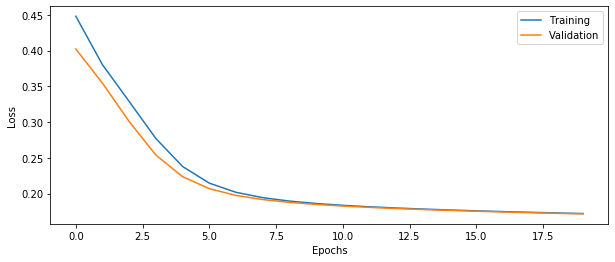

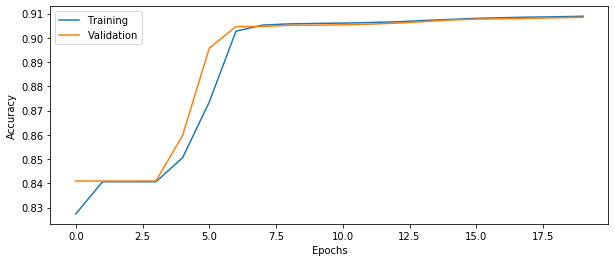

In [14]:
# Plot the history from the training run
plot_results(history1)

# Part 12: More questions

**Question 9: What happens if you add several Dense layers without specifying the activation function?**


The activiation model is by default the 'sigmoid' function, as defined in the model function in part 10.

**Question 10: How are the weights in each dense layer initialized as default? How are the bias weights initialized?**



In our model we did not specify the initialization of the weights, thus we are assuming the default settings are used.
The Keras documentation teaches us that the weights are glorot uniform, which means that they are uniformly sampled between -limit and limit.
Where the limit is: sqrt(6 / (#input_units + #output_units)) in the weight tensor.


# Part 13: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [15]:
from sklearn.utils import class_weight

# Calculate class weights
#sklearn.utils.class_weight.compute_class_weight(class_weight, classes, y)
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Ytrain),
                                                 Ytrain)

# Print the class weights
print(class_weights)

[3.13714634 0.59479944]


### 2 layers, 20 nodes, class weights

In [23]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model2 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=20,
                   act_fun='sigmoid', 
                   optimizer='sgd', 
                   learning_rate=0.1, 
                   use_bn=False, 
                   use_dropout=False, 
                   use_custom_dropout=False)

history2 = model2.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 1s - loss: 0.4190 - accuracy: 0.8406 - val_loss: 0.3875 - val_accuracy: 0.8409
Epoch 2/20
 - 1s - loss: 0.3627 - accuracy: 0.8406 - val_loss: 0.3346 - val_accuracy: 0.8409
Epoch 3/20
 - 1s - loss: 0.3081 - accuracy: 0.8406 - val_loss: 0.2809 - val_accuracy: 0.8409
Epoch 4/20
 - 1s - loss: 0.2601 - accuracy: 0.8423 - val_loss: 0.2410 - val_accuracy: 0.8526
Epoch 5/20
 - 1s - loss: 0.2284 - accuracy: 0.8620 - val_loss: 0.2176 - val_accuracy: 0.8794
Epoch 6/20
 - 1s - loss: 0.2105 - accuracy: 0.8906 - val_loss: 0.2045 - val_accuracy: 0.9029
Epoch 7/20
 - 1s - loss: 0.2002 - accuracy: 0.9041 - val_loss: 0.1966 - val_accuracy: 0.9039
Epoch 8/20
 - 1s - loss: 0.1938 - accuracy: 0.9047 - val_loss: 0.1914 - val_accuracy: 0.9043
Epoch 9/20
 - 1s - loss: 0.1894 - accuracy: 0.9053 - val_loss: 0.1877 - val_accuracy: 0.9050
Epoch 10/20
 - 1s - loss: 0.1861 - accuracy: 0.9061 - val_loss: 0.1848 - val_accuracy: 0.9056
Epoch 11/20
 - 1s

In [18]:
# Evaluate model on test data
score = model2.evaluate(Xtest,Ytest,batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 0s 1us/step
Test loss: 0.1729
Test accuracy: 0.9075


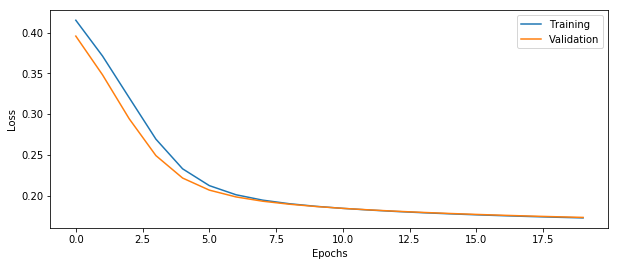

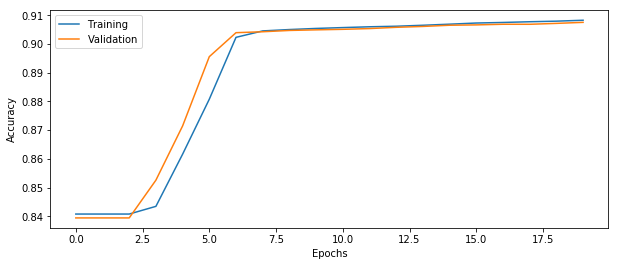

In [20]:
plot_results(history2)

# Part 14: More questions

**Question 11: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.**


Deep Learning requires so much data that it normally cannot fit in the memory of the GPU at once, especially accounting for the weights of the network, gradients of all parameters, and the outputs and filter responses for each layer. The more data, the faster it grows, because it is not linear.

**Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.**




**Question 13: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results.**


Our own computers (CPU: Intel Core i7-8550U, GPU: GeForce 940MX) produced the following results when rerunning part 13 with different batch sizes.
Batchsize | average time per epoch
10000     | 3s
1000      | 3.3s
100       | 16s
This result is not surprising, a small batch size corresponds to a larger number of weight updates as follows: #training_examples/batch_size. From the formula it becomes clear that when the batch size is small the number of weight updates will increase. More computations take longer time.

**Question 14: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?**


The training data has 534896 observations, thus the number of weight updates are:
100: 534896/100 = 5349
1000: 534896/1000 = 535
10000: 534896/10000 = 53

**Question 15: What limits how large the batch size can be?**


The GPU is normally the limiting factor. A strong GPU can handle larger batch sizes.

**Question 16: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?**


For small batch sizes there is a higher uncertainty about the gradient, thus the learning rate needs to be small in order to estimate it correctly. In contrast, a large batch size can have a larger learning rate because it has fewer weight updates.

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

# Part 15: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

**Question 17: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()**

2 layers, 20 nodes has 2,301 trainable parameters
4 layers, 50 nodes has 12,351 trainable parameters

### 4 layers, 20 nodes, class weights

In [19]:
# Let's find out for model2
model2.summary()

# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model3 = build_DNN(input_shape=input_shape, 
                   n_layers=4, 
                   n_nodes=20,
                   act_fun='sigmoid', 
                   optimizer='sgd', 
                   learning_rate=0.1, 
                   use_bn=False, 
                   use_dropout=False, 
                   use_custom_dropout=False)

history3 = model3.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                1860      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________
Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 1s - loss: 0.4448 - accuracy: 0.8406 - val_loss: 0.4381 - val_accuracy: 0.8409
Epoch 2/20
 - 1s - loss: 0.4385 - accuracy: 0.8406 - val_loss: 0.4379 - val_accuracy: 0.8409
Epoch 3/20
 - 1s - loss: 0.4383 - accuracy: 0.8406 - val_loss: 0.4377 - val_accuracy: 0.8409
Epoch 4/20
 - 1s - loss: 0.4381 - accuracy: 0.8406 

In [32]:
# Evaluate model on test data
score = model3.evaluate(Xtest,Ytest,batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 0s 1us/step
Test loss: 0.4280
Test accuracy: 0.8418


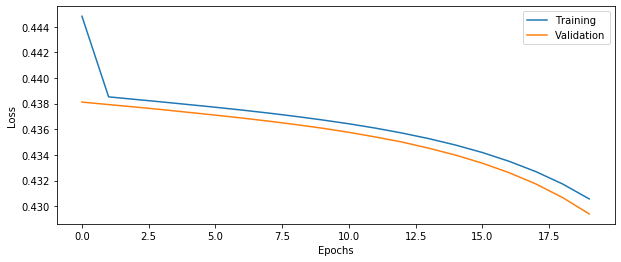

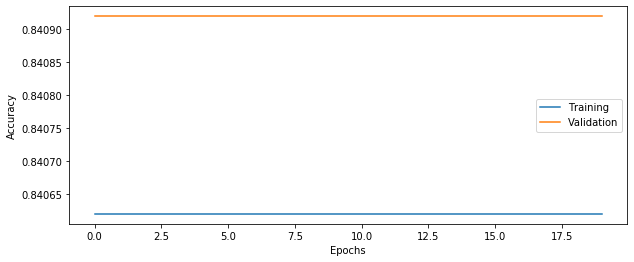

In [33]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [31]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model4 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=50,
                   act_fun='sigmoid', 
                   optimizer='sgd', 
                   learning_rate=0.1, 
                   use_bn=False, 
                   use_dropout=False, 
                   use_custom_dropout=False)

history4 = model4.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 7s - loss: 0.4313 - accuracy: 0.8278 - val_loss: 0.3990 - val_accuracy: 0.8394
Epoch 2/20
 - 5s - loss: 0.3704 - accuracy: 0.8408 - val_loss: 0.3412 - val_accuracy: 0.8394
Epoch 3/20
 - 5s - loss: 0.3067 - accuracy: 0.8412 - val_loss: 0.2758 - val_accuracy: 0.8473
Epoch 4/20
 - 6s - loss: 0.2509 - accuracy: 0.8553 - val_loss: 0.2330 - val_accuracy: 0.8639
Epoch 5/20
 - 6s - loss: 0.2204 - accuracy: 0.8781 - val_loss: 0.2127 - val_accuracy: 0.8892
Epoch 6/20
 - 5s - loss: 0.2059 - accuracy: 0.8925 - val_loss: 0.2027 - val_accuracy: 0.8937
Epoch 7/20
 - 7s - loss: 0.1983 - accuracy: 0.8979 - val_loss: 0.1968 - val_accuracy: 0.8989
Epoch 8/20
 - 6s - loss: 0.1934 - accuracy: 0.9020 - val_loss: 0.1928 - val_accuracy: 0.9024
Epoch 9/20
 - 6s - loss: 0.1899 - accuracy: 0.9045 - val_loss: 0.1897 - val_accuracy: 0.9040
Epoch 10/20
 - 5s - loss: 0.1872 - accuracy: 0.9052 - val_loss: 0.1872 - val_accuracy: 0.9044
Epoch 11/20
 - 6s

In [32]:
# Evaluate model on test data
score = model4.evaluate(Xtest,Ytest,batch_size=100)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 4s 33us/step
Test loss: 0.1719
Test accuracy: 0.9090


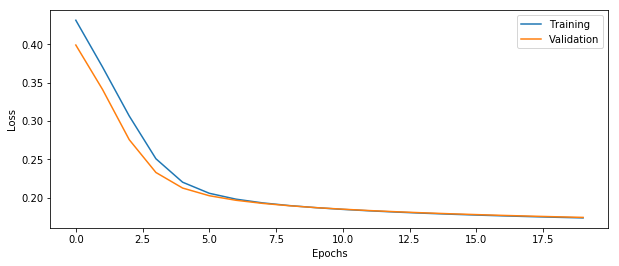

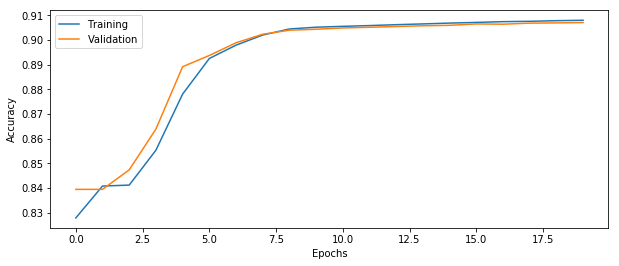

In [33]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [34]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model5 = build_DNN(input_shape=input_shape, 
                   n_layers=4, 
                   n_nodes=50,
                   act_fun='sigmoid', 
                   optimizer='sgd', 
                   learning_rate=0.1, 
                   use_bn=False, 
                   use_dropout=False, 
                   use_custom_dropout=False)

history5 = model5.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 7s - loss: 0.4463 - accuracy: 0.8408 - val_loss: 0.4404 - val_accuracy: 0.8394
Epoch 2/20
 - 6s - loss: 0.4380 - accuracy: 0.8408 - val_loss: 0.4401 - val_accuracy: 0.8394
Epoch 3/20
 - 6s - loss: 0.4378 - accuracy: 0.8408 - val_loss: 0.4398 - val_accuracy: 0.8394
Epoch 4/20
 - 7s - loss: 0.4375 - accuracy: 0.8408 - val_loss: 0.4396 - val_accuracy: 0.8394
Epoch 5/20
 - 7s - loss: 0.4372 - accuracy: 0.8408 - val_loss: 0.4392 - val_accuracy: 0.8394
Epoch 6/20
 - 6s - loss: 0.4368 - accuracy: 0.8408 - val_loss: 0.4389 - val_accuracy: 0.8394
Epoch 7/20
 - 7s - loss: 0.4364 - accuracy: 0.8408 - val_loss: 0.4385 - val_accuracy: 0.8394
Epoch 8/20
 - 6s - loss: 0.4360 - accuracy: 0.8408 - val_loss: 0.4380 - val_accuracy: 0.8394
Epoch 9/20
 - 6s - loss: 0.4355 - accuracy: 0.8408 - val_loss: 0.4374 - val_accuracy: 0.8394
Epoch 10/20
 - 6s - loss: 0.4349 - accuracy: 0.8408 - val_loss: 0.4368 - val_accuracy: 0.8394
Epoch 11/20
 - 6s

In [35]:
# Evaluate model on test data
score = model5.evaluate(Xtest,Ytest,batch_size=100)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 5s 40us/step
Test loss: 0.3982
Test accuracy: 0.8425


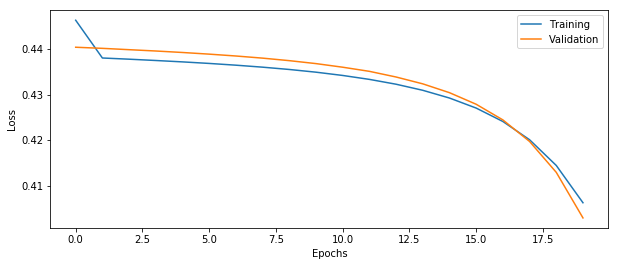

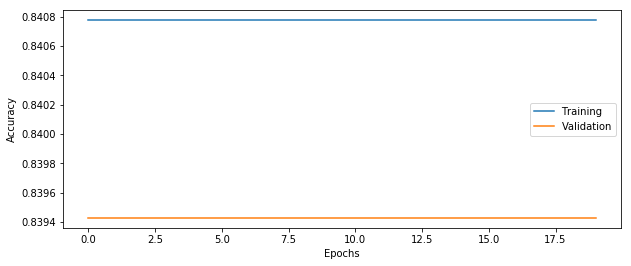

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                4650      
_________________________________________________________________
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 51        
Total params: 12,351
Trainable params: 12,351
Non-trainable params: 0
_________________________________________________________________


In [36]:
plot_results(history5)

model5.summary()

# Part 16: Batch normalization

Now add batch normalization after each dense layer. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

**Question 18: Why is batch normalization important when training deep networks?**


Batch normalization improves the stability, performance and speed of the DNN

### 2 layers, 20 nodes, class weights, batch normalization

In [39]:
# We want back to modify the original function to incorporate the batch normalization
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model6 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=20,
                   act_fun='sigmoid', 
                   optimizer='sgd', 
                   learning_rate=0.1, 
                   use_bn=True, 
                   use_dropout=False, 
                   use_custom_dropout=False)

history6 = model6.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 8s - loss: 0.2960 - accuracy: 0.8882 - val_loss: 0.4276 - val_accuracy: 0.8394
Epoch 2/20
 - 5s - loss: 0.1876 - accuracy: 0.9087 - val_loss: 0.4707 - val_accuracy: 0.8394
Epoch 3/20
 - 5s - loss: 0.1737 - accuracy: 0.9122 - val_loss: 0.4941 - val_accuracy: 0.8394
Epoch 4/20
 - 5s - loss: 0.1679 - accuracy: 0.9143 - val_loss: 0.4977 - val_accuracy: 0.8394
Epoch 5/20
 - 5s - loss: 0.1646 - accuracy: 0.9151 - val_loss: 0.4829 - val_accuracy: 0.8394
Epoch 6/20
 - 5s - loss: 0.1622 - accuracy: 0.9153 - val_loss: 0.4531 - val_accuracy: 0.8394
Epoch 7/20
 - 5s - loss: 0.1606 - accuracy: 0.9156 - val_loss: 0.4127 - val_accuracy: 0.8394
Epoch 8/20
 - 5s - loss: 0.1591 - accuracy: 0.9160 - val_loss: 0.3575 - val_accuracy: 0.8394
Epoch 9/20
 - 5s - loss: 0.1579 - accuracy: 0.9163 - val_loss: 0.2959 - val_accuracy: 0.8395
Epoch 10/20
 - 5s - loss: 0.1569 - accuracy: 0.9166 - val_loss: 0.2388 - val_accuracy: 0.8457
Epoch 11/20
 - 5s

In [40]:
# Evaluate model on test data
score = model6.evaluate(Xtest,Ytest,batch_size=100)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 4s 38us/step
Test loss: 0.1500
Test accuracy: 0.9182


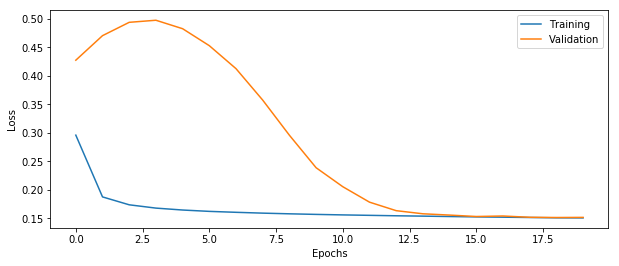

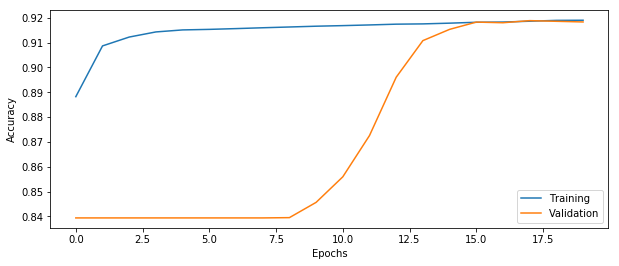

In [41]:
plot_results(history6)

# Part 17: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [43]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model7 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=20,
                   act_fun='relu', 
                   optimizer='sgd', 
                   learning_rate=0.1, 
                   use_bn=True, 
                   use_dropout=False, 
                   use_custom_dropout=False)

history7 = model7.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 8s - loss: 0.3130 - accuracy: 0.8837 - val_loss: 0.3156 - val_accuracy: 0.8463
Epoch 2/20
 - 5s - loss: 0.1929 - accuracy: 0.9084 - val_loss: 0.3004 - val_accuracy: 0.8465
Epoch 3/20
 - 5s - loss: 0.1753 - accuracy: 0.9137 - val_loss: 0.2848 - val_accuracy: 0.8472
Epoch 4/20
 - 5s - loss: 0.1678 - accuracy: 0.9158 - val_loss: 0.2438 - val_accuracy: 0.8503
Epoch 5/20
 - 5s - loss: 0.1632 - accuracy: 0.9167 - val_loss: 0.2139 - val_accuracy: 0.8548
Epoch 6/20
 - 4s - loss: 0.1599 - accuracy: 0.9173 - val_loss: 0.1880 - val_accuracy: 0.8652
Epoch 7/20
 - 5s - loss: 0.1576 - accuracy: 0.9177 - val_loss: 0.1719 - val_accuracy: 0.8821
Epoch 8/20
 - 5s - loss: 0.1556 - accuracy: 0.9186 - val_loss: 0.1648 - val_accuracy: 0.8971
Epoch 9/20
 - 5s - loss: 0.1541 - accuracy: 0.9189 - val_loss: 0.1575 - val_accuracy: 0.9130
Epoch 10/20
 - 5s - loss: 0.1517 - accuracy: 0.9193 - val_loss: 0.1522 - val_accuracy: 0.9202
Epoch 11/20
 - 5s

In [44]:
# Evaluate model on test data
score = model7.evaluate(Xtest,Ytest,batch_size=100)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 4s 36us/step
Test loss: 0.1428
Test accuracy: 0.9254


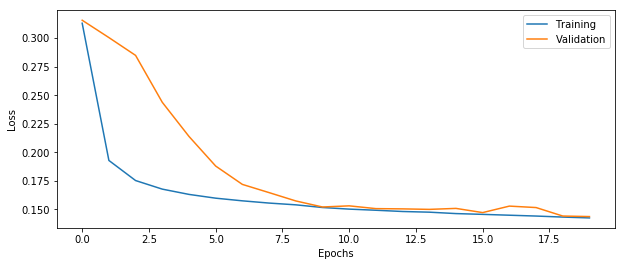

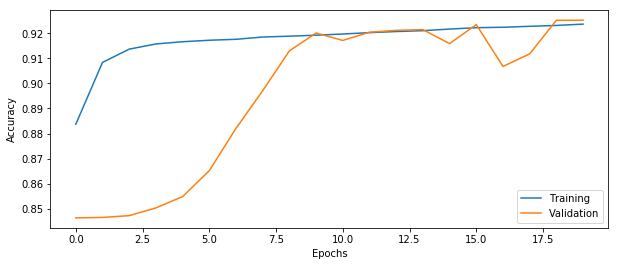

In [45]:
plot_results(history7)

# Part 18: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [48]:
# again, went back to improve the model function
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model8 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=20,
                   act_fun='sigmoid', 
                   optimizer='adam', 
                   learning_rate=0.1, 
                   use_bn=True, 
                   use_dropout=False, 
                   use_custom_dropout=False)

history8 = model8.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 8s - loss: 0.2228 - accuracy: 0.8797 - val_loss: 0.7996 - val_accuracy: 0.8394
Epoch 2/20
 - 5s - loss: 0.1590 - accuracy: 0.9153 - val_loss: 0.8020 - val_accuracy: 0.8394
Epoch 3/20
 - 5s - loss: 0.1566 - accuracy: 0.9159 - val_loss: 0.7380 - val_accuracy: 0.8394
Epoch 4/20
 - 5s - loss: 0.1544 - accuracy: 0.9166 - val_loss: 0.5395 - val_accuracy: 0.8394
Epoch 5/20
 - 5s - loss: 0.1507 - accuracy: 0.9186 - val_loss: 0.4421 - val_accuracy: 0.8420
Epoch 6/20
 - 5s - loss: 0.1472 - accuracy: 0.9184 - val_loss: 0.4123 - val_accuracy: 0.8430
Epoch 7/20
 - 5s - loss: 0.1435 - accuracy: 0.9171 - val_loss: 0.2980 - val_accuracy: 0.8467
Epoch 8/20
 - 5s - loss: 0.1423 - accuracy: 0.9172 - val_loss: 0.2368 - val_accuracy: 0.8644
Epoch 9/20
 - 5s - loss: 0.1442 - accuracy: 0.9163 - val_loss: 0.1651 - val_accuracy: 0.8690
Epoch 10/20
 - 5s - loss: 0.1402 - accuracy: 0.9179 - val_loss: 0.1435 - val_accuracy: 0.9029
Epoch 11/20
 - 5s

In [49]:
# Evaluate model on test data
score = model8.evaluate(Xtest,Ytest,batch_size=100)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 4s 36us/step
Test loss: 0.1286
Test accuracy: 0.9314


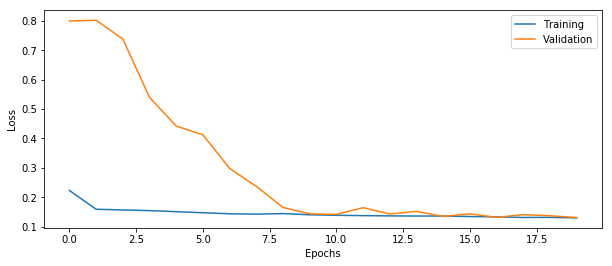

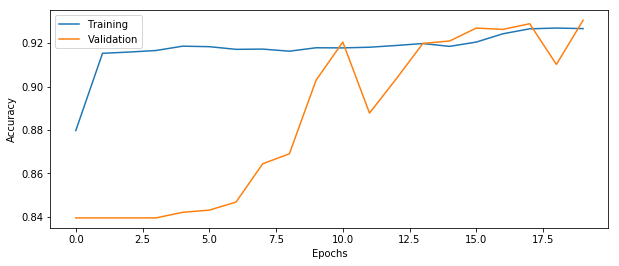

In [50]:
plot_results(history8)

# Part 19: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer), with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/layers/core/ for how the Dropout layer works.

---

**Question 19: How does the validation accuracy change when adding dropout?**


With dropout: val_accuracy: 0.9062 (model9)     
Without dropout: val_accuracy: 0.9075 (model2)

**Question 20: How does the test accuracy change when adding dropout?**


With dropout: Test accuracy: 0.9079 (model9)     
Without dropout: Test accuracy: 0.9091 (model2)


### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [12]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train model
model9 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=20,
                   act_fun='sigmoid', 
                   optimizer='sgd', 
                   learning_rate=0.1, 
                   use_bn=False, 
                   use_dropout=True, 
                   use_custom_dropout=False)

history9 = model9.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Instructions for updating:
Use tf.cast instead.
Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 4s - loss: 0.4644 - accuracy: 0.8323 - val_loss: 0.4127 - val_accuracy: 0.8399
Epoch 2/20
 - 3s - loss: 0.4224 - accuracy: 0.8401 - val_loss: 0.3824 - val_accuracy: 0.8399
Epoch 3/20
 - 3s - loss: 0.3891 - accuracy: 0.8412 - val_loss: 0.3475 - val_accuracy: 0.8399
Epoch 4/20
 - 3s - loss: 0.3536 - accuracy: 0.8427 - val_loss: 0.3086 - val_accuracy: 0.8399
Epoch 5/20
 - 3s - loss: 0.3188 - accuracy: 0.8467 - val_loss: 0.2718 - val_accuracy: 0.8399
Epoch 6/20
 - 3s - loss: 0.2886 - accuracy: 0.8533 - val_loss: 0.2434 - val_accuracy: 0.8399
Epoch 7/20
 - 3s - loss: 0.2666 - accuracy: 0.8588 - val_loss: 0.2243 - val_accuracy: 0.8458
Epoch 8/20
 - 3s - loss: 0.2511 - accuracy: 0.8640 - val_loss: 0.2120 - val_accuracy: 0.8609
Epoch 9/20
 - 3s - loss: 0.2408 - accuracy: 0.8664 - val_loss: 0.2043 - val_accuracy: 0.8807
Epoch 10/20
 - 3s - loss: 0.2326 - accuracy: 0.8695 - val_loss:

In [53]:
# Evaluate model on test data
score = model9.evaluate(Xtest,Ytest,batch_size=100)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 4s 38us/step
Test loss: 0.1776
Test accuracy: 0.9079


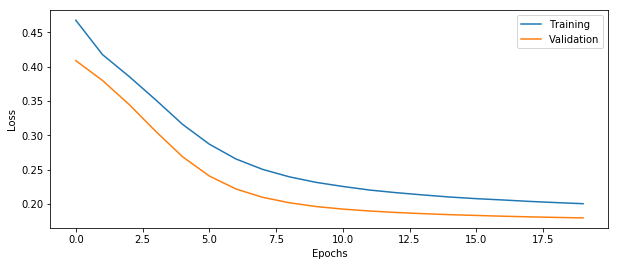

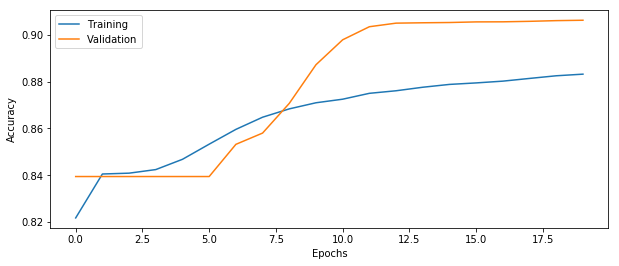

In [54]:
plot_results(history9)

# Part 20: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 21: How high classification accuracy can you achieve for the test data? What is your best configuration?

In [13]:
# Find your best configuration for the DNN
'''
Let's start by reviewing the models that we've created before:
model1
loss: 0.1722 - accuracy: 0.9086 - val_loss: 0.1727 - val_accuracy: 0.9080
Test loss: 0.1711
Test accuracy: 0.9089
model2
loss: 0.1728 - accuracy: 0.9086 - val_loss: 0.1733 - val_accuracy: 0.9075
Test loss: 0.1711
Test accuracy: 0.9091
model3
loss: 0.4244 - accuracy: 0.8408 - val_loss: 0.4250 - val_accuracy: 0.8394
Test loss: 0.4199
Test accuracy: 0.8425
model4
loss: 0.1738 - accuracy: 0.9080 - val_loss: 0.1745 - val_accuracy: 0.9071
Test loss: 0.1719
Test accuracy: 0.9090
model5
loss: 0.4063 - accuracy: 0.8408 - val_loss: 0.4029 - val_accuracy: 0.8394
Test loss: 0.3982
Test accuracy: 0.8425
model6
loss: 0.1507 - accuracy: 0.9190 - val_loss: 0.1516 - val_accuracy: 0.9183
Test loss: 0.1500
Test accuracy: 0.9182
model7
loss: 0.1426 - accuracy: 0.9237 - val_loss: 0.1438 - val_accuracy: 0.9253
Test loss: 0.1428
Test accuracy: 0.9254
model8
loss: 0.1295 - accuracy: 0.9267 - val_loss: 0.1308 - val_accuracy: 0.9305
Test loss: 0.1286
Test accuracy: 0.9314
model9:
loss: 0.2006 - accuracy: 0.8832 - val_loss: 0.1799 - val_accuracy: 0.9062
Test loss: 0.1776
Test accuracy: 0.9079


'''

batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train DNN
model10 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=20,
                   act_fun='relu', 
                   optimizer='adam', 
                   learning_rate=0.1, 
                   use_bn=True, 
                   use_dropout=True, 
                   use_custom_dropout=False)

history10 = model10.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval))

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 5s - loss: 0.2067 - accuracy: 0.8962 - val_loss: 0.3231 - val_accuracy: 0.9123
Epoch 2/20
 - 3s - loss: 0.1632 - accuracy: 0.9095 - val_loss: 0.2189 - val_accuracy: 0.9149
Epoch 3/20
 - 3s - loss: 0.1551 - accuracy: 0.9147 - val_loss: 0.1542 - val_accuracy: 0.9184
Epoch 4/20
 - 3s - loss: 0.1514 - accuracy: 0.9184 - val_loss: 0.1472 - val_accuracy: 0.9223
Epoch 5/20
 - 3s - loss: 0.1502 - accuracy: 0.9189 - val_loss: 0.1450 - val_accuracy: 0.9229
Epoch 6/20
 - 3s - loss: 0.1471 - accuracy: 0.9214 - val_loss: 0.1428 - val_accuracy: 0.9268
Epoch 7/20
 - 3s - loss: 0.1443 - accuracy: 0.9224 - val_loss: 0.1418 - val_accuracy: 0.9252
Epoch 8/20
 - 3s - loss: 0.1432 - accuracy: 0.9234 - val_loss: 0.1465 - val_accuracy: 0.9118
Epoch 9/20
 - 3s - loss: 0.1413 - accuracy: 0.9246 - val_loss: 0.1439 - val_accuracy: 0.9160
Epoch 10/20
 - 3s - loss: 0.1394 - accuracy: 0.9260 - val_loss: 0.1595 - val_accuracy: 0.9210
Epoch 11/20
 - 3s

In [60]:
# Evaluate DNN on test data
score = model10.evaluate(Xtest,Ytest,batch_size=100)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

'''
model_10_layers:
loss: 0.4403 - accuracy: 0.8408 - val_loss: 0.4406 - val_accuracy: 0.8394
Test loss: 0.4355
Test accuracy: 0.8425
model_relu_adam_bn:
loss: 0.1176 - accuracy: 0.9351 - val_loss: 0.1298 - val_accuracy: 0.9324
Test loss: 0.1274
Test accuracy: 0.9330
model_relu_adam_bn_dropout:
loss: 0.1346 - accuracy: 0.9288 - val_loss: 0.1364 - val_accuracy: 0.9295
Test loss: 0.1351
Test accuracy: 0.9296
We will proceed with batch size 10000, epochs 20, nodes 20, layers 2, relu activation, adam optimizer, learning rate 0.1, and batch normalization
'''

114620/114620 [==============================] - 5s 43us/step
Test loss: 0.1351
Test accuracy: 0.9296


'\nmodel_10_layers:\nloss: 0.4403 - accuracy: 0.8408 - val_loss: 0.4406 - val_accuracy: 0.8394\nTest loss: 0.4355\nTest accuracy: 0.8425\nmodel_relu_adam_bn:\nloss: 0.1176 - accuracy: 0.9351 - val_loss: 0.1298 - val_accuracy: 0.9324\nTest loss: 0.1274\nTest accuracy: 0.9330\nmodel_relu_adam_bn_dropout:\nloss: 0.1346 - accuracy: 0.9288 - val_loss: 0.1364 - val_accuracy: 0.9295\n\n'

# Part 21: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN.

Run the same test data through the trained network 100 times, with dropout turned on. 

**Question 22: What is the mean and the standard deviation of the test accuracy?**


We unfortunately get a NameError, saying K is not defined. We therefore can not present the mean and standard deviation of the test accuracy right now, but we provided the code of how we would calculate it.

In [44]:
import keras

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [69]:
# Your best training parameters
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]

# Build and train DNN
model11 = build_DNN(input_shape=input_shape, 
                   n_layers=2, 
                   n_nodes=20,
                   act_fun='relu', 
                   optimizer='adam', 
                   learning_rate=0.1, 
                   use_bn=True, 
                   use_dropout=False, 
                   use_custom_dropout=True)

history11 = model11.fit(Xtrain, 
                      Ytrain, 
                      class_weight=class_weights,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(Xval,Yval)) 

Train on 534896 samples, validate on 114621 samples
Epoch 1/20
 - 1s - loss: 0.2121 - accuracy: 0.8870 - val_loss: 0.5315 - val_accuracy: 0.8987
Epoch 2/20
 - 1s - loss: 0.1604 - accuracy: 0.9136 - val_loss: 0.2246 - val_accuracy: 0.9113
Epoch 3/20
 - 1s - loss: 0.1570 - accuracy: 0.9153 - val_loss: 0.1650 - val_accuracy: 0.9174
Epoch 4/20
 - 1s - loss: 0.1510 - accuracy: 0.9180 - val_loss: 0.1564 - val_accuracy: 0.9192
Epoch 5/20
 - 1s - loss: 0.1478 - accuracy: 0.9193 - val_loss: 0.1491 - val_accuracy: 0.9199
Epoch 6/20
 - 1s - loss: 0.1456 - accuracy: 0.9212 - val_loss: 0.1534 - val_accuracy: 0.9011
Epoch 7/20
 - 1s - loss: 0.1438 - accuracy: 0.9227 - val_loss: 0.1422 - val_accuracy: 0.9242
Epoch 8/20
 - 1s - loss: 0.1422 - accuracy: 0.9233 - val_loss: 0.1407 - val_accuracy: 0.9237
Epoch 9/20
 - 1s - loss: 0.1392 - accuracy: 0.9250 - val_loss: 0.1425 - val_accuracy: 0.9260
Epoch 10/20
 - 1s - loss: 0.1386 - accuracy: 0.9254 - val_loss: 0.1667 - val_accuracy: 0.8943
Epoch 11/20
 - 1s

In [46]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest,Ytest,batch_size=100)
                       
print('Test accuracy: %.4f' % score[1])

114620/114620 [==============================] - 1s 7us/step
Test accuracy: 0.9362


In [115]:
import numpy as np
# Run the testing 100 times, and save the accuracies in an array
batch_size = 10000
epochs = 20
input_shape = Xtrain.shape[1:]
accuracies = []



seed(123)
for i in range(100):
    model = build_DNN(input_shape=input_shape, 
               n_layers=2, 
               n_nodes=20,
               act_fun='relu', 
               optimizer='adam', 
               learning_rate=0.1, 
               use_bn=True, 
               use_dropout=False, 
               use_custom_dropout=True)
    score = model.evaluate(Xtest,Ytest,batch_size=100)
    accuracies.append(score[1])
    

# Calculate and print mean and std of accuracies
print('Mean of Test Accuracies: %.4f' % np.mean(accuracies))
print('Standard Deviation of Test Accuracies: %.4f' % np.std(accuracies))

114620/114620 [==============================] - 8s 66us/step
Mean of Test Accuracies: 0.5028
Standard Deviation of Test Accuracies: 0.2980


# Part 22: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

**Question 23: What is the mean and the standard deviation of the test accuracy?**


From the Cross validation, we have:
Mean Test Accuracies: 0.1682
Standard Deviation Test Accuracies: 0.3363


**Question 24: What is the main advantage of dropout compared to CV for estimating test uncertainty?**


For extimating test uncertainty, the main advantage of dropout is that it has a regularzation effect on both training data and the test data, which can prevent overfitting.


<generator object _BaseKFold.split at 0x7f1072895938>

In [1]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

accuracies = []
# Loop over cross validation folds
for train_index, test_index in cv.split(X2, Y ):
    X_train, X_test = X2[train_index], X2[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

        
    # Calculate class weights for current split
    class_weights_cv = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
    

    # Rebuild the DNN model, to not continue training on the previously trained model
    model_cv = build_DNN(input_shape=X_train.shape[1:], 
               n_layers=2, 
               n_nodes=20,
               act_fun='relu', 
               optimizer='adam', 
               learning_rate=0.1, 
               use_bn=True, 
               use_dropout=False, 
               use_custom_dropout=False)


    # Fit the model with training set and class weights for this fold
    history_cv = model_cv.fit(X_train, 
                      y_train, 
                      class_weight=class_weights_cv,
                      batch_size=batch_size, 
                      epochs=epochs,
                      verbose=2,
                      validation_data=(X_test,y_test)) 
    
    # Evaluate the model using the test set for this fold
    score_cv = model_cv.evaluate(X_test,y_test,batch_size)
    
    # Save the test accuracy in an array
    accuracies.append(score_cv[1])
    
# Calculate and print mean and std of accuracies

print('Mean Test Accuracies: %.4f' % np.mean(accuracies))
print('Standard Deviation Test Accuracies: %.4f' % np.std(accuracies))

NameError: name 'X2' is not defined

# Part 23: DNN regression

A similar DNN can be used for regression, instead of classification.

**Question 25: How would you change the DNN in order to use it for regression instead?**


Change the loss function to the Mean Square Error.
calculate the score: score = model.evaluate(Xtest,Ytest,batch_size=100)
and do predictions: predictions = model.predict(Xtest, batch_size=100)

## Report

Send in this jupyter notebook, with answers to all questions.